## Acceleration using JAX


https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

In [1]:
import jax
import jax.numpy as jnp

import numpy as np
import time

import matplotlib.pyplot as plt

In [2]:
jax.devices()

[CpuDevice(id=0)]

## Define function (Numpy)

In [3]:
def myfunc_np(x, alpha=1.67, lmbda=1.05):
  
  return lmbda * np.where(x > 0, x, alpha * np.exp(x) - alpha)

## Define function (JAX)

In [4]:
def myfunc_jnp(x, alpha=1.67, lmbda=1.05):
  
  return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

## Check function

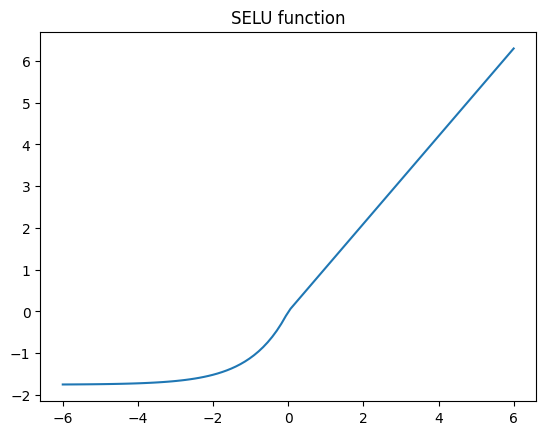

In [5]:
x = np.linspace(-6, 6, 100)
y = myfunc_np(x)

plt.plot(x, y)
plt.title('SELU function');

## Measure Time (Numpy)

In [6]:
x = np.random.normal(size=(5000000,)).astype(np.float32)

In [7]:
for k in range(10):

  time_bgn = time.time()

  myfunc_np(x)

  time_end = time.time()

  elapsed_time_ms = (time_end - time_bgn) * 1000

  print('[ms] : {:.4f}'.format(elapsed_time_ms))

[ms] : 44.0271
[ms] : 38.6975
[ms] : 38.2831
[ms] : 39.4082
[ms] : 38.5551
[ms] : 39.5639
[ms] : 39.3176
[ms] : 39.0663
[ms] : 39.4952
[ms] : 38.5227


## Measure Time (JAX)

In [8]:
myfunc_jit = jax.jit(myfunc_jnp)

In [9]:
for k in range(10):

  time_bgn = time.time()

  myfunc_jit(x).block_until_ready()

  time_end = time.time()

  elapsed_time_ms = (time_end - time_bgn) * 1000

  print('[ms]: {:.4f}'.format(elapsed_time_ms))

[ms]: 47.6124
[ms]: 11.4238
[ms]: 11.9340
[ms]: 11.2939
[ms]: 5.6939
[ms]: 9.9306
[ms]: 3.8636
[ms]: 9.9363
[ms]: 3.6647
[ms]: 3.9322
